# Random Forest Analysis on Car Dataset
In this notebook, we will analyze the Car Evaluation dataset using various models, including Decision Trees and Random Forests. We will also explore bootstrapping techniques and evaluate model performance using accuracy, precision, and recall metrics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
    names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "accep"],
)
df["accep"] = ~(df["accep"] == "unacc")  # 1 is acceptable, 0 if not acceptable
X = pd.get_dummies(df.iloc[:, 0:6], drop_first=True)
y = df["accep"]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.25
)

### Print Number of Rows and Distribution of Safety Ratings
We will first check the number of rows in the dataset and the distribution of safety ratings.

In [2]:
nrows = df.shape[0]
print(nrows)
print(f"Distribution of safety ratings in {nrows} of data:")
print(df.safety.value_counts(normalize=True))

1728
Distribution of safety ratings in 1728 of data:
safety
low     0.333333
med     0.333333
high    0.333333
Name: proportion, dtype: float64


### Create Bootstrapped Sample
Next, we will create a bootstrapped sample of the data and examine the distribution of safety ratings.

In [3]:
boot_sample = df.sample(nrows, replace=True)
print(f"Distribution of safety ratings in bootstrapped sample data:")
print(boot_sample.safety.value_counts(normalize=True))

Distribution of safety ratings in bootstrapped sample data:
safety
high    0.337963
low     0.333333
med     0.328704
Name: proportion, dtype: float64


### Create 1000 Bootstrapped Samples
We will generate 1000 bootstrapped samples and calculate the percentage of low safety ratings.

In [4]:
low_perc = []
for i in range(1000):
    boot_sample = df.sample(nrows, replace=True)
    low_perc.append(boot_sample.safety.value_counts(normalize=True)["low"])

### Plot a Histogram of Low Percentage Values
Next, we will plot a histogram to visualize the distribution of low safety percentage values.

0.33305381944444445


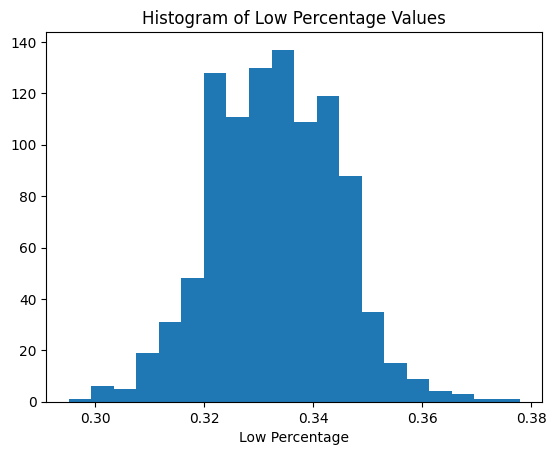

In [5]:
mean_lp = np.mean(low_perc)
print(mean_lp)
plt.hist(low_perc, bins=20)
plt.xlabel("Low Percentage")
plt.title("Histogram of Low Percentage Values")
plt.show()

### Calculate 2.5 and 97.5 Percentiles
Finally, we will calculate the 95% confidence interval for the low safety percentage.

In [6]:
low_perc.sort()
print(f"Average low percentage: {np.mean(low_perc).round(4)}")
print(
    f"95% Confidence Interval for low percentage: ({low_perc[25].round(4)},{low_perc[975].round(4)})"
)

Average low percentage: 0.3331
95% Confidence Interval for low percentage: (0.3108,0.3547)


### Decision Trees
We will now train and evaluate a Decision Tree Classifier on the dataset.

In [7]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)
print(
    f"Accuracy score of DT on test set (trained using full set): {round(dt.score(x_test, y_test), 4)}"
)

Accuracy score of DT on test set (trained using full set): 0.8588


### Bootstrapping Decision Trees
We will train a Decision Tree on a bootstrapped sample and evaluate its performance.

In [8]:
dt2 = DecisionTreeClassifier(max_depth=5)
# ids are the indices of the bootstrapped sample
ids = x_train.sample(x_train.shape[0], replace=True, random_state=0).index
dt2.fit(x_train.loc[ids], y_train.loc[ids])
print(
    f"Accuracy score of DT on test set (trained using bootstrapped sample): {round(dt2.score(x_test, y_test), 4)}"
)

Accuracy score of DT on test set (trained using bootstrapped sample): 0.8912


### Random Forest
Now we will train a Random Forest model on the dataset and evaluate its performance.

In [9]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(x_train, y_train)
print(
    f"Accuracy score of RF on test set: {round(rf.score(x_test, y_test), 4)}"
)

Accuracy score of RF on test set: 0.8981
